In [1]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr


from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [2]:
DATASET = 'Dataset2.0.csv'

In [4]:
def make_pretty(styler):
    styler.set_caption("Pearson Correlation")
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap="YlGnBu")
    return styler

Pearson Lipid Correlations

In [7]:
dataset = pd.read_csv(DATASET)
pearson_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
pearson_cor['Feature'] = None
pearson_cor['LHC_ICV'] = None
pearson_cor['RHC_ICV'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []
for i in dataset.columns[48:837 + 1]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = pearsonr(lista,listaL)
    corrR, _ = pearsonr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)
pearson_cor['Feature'] = lista1
pearson_cor['LHC_ICV'] = lista2
pearson_cor['RHC_ICV'] = lista3
pearson_cor = pearson_cor.sort_values(by='LHC_ICV')
pearson_cor.style.pipe(make_pretty)


,Feature,LHC_ICV,RHC_ICV
716,TG.52.4...NL.16.1.,-0.191813,-0.191624
467,LPE.20.4...SN1.,-0.184160,-0.157094
468,LPE.20.4...SN2.,-0.171403,-0.147895
714,TG.52.3...NL.16.1.,-0.170265,-0.172150
595,AC.18.0.,-0.162169,-0.153938
596,AC.18.1.,-0.158952,-0.143309
465,LPE.18.2...SN1.,-0.156527,-0.148852
295,LPC.18.1...SN1.,-0.145502,-0.127493
665,TG.54.4...SIM.,-0.144503,-0.144093
105,GM3.D18.1.24.1.,-0.138815,-0.154672


Spearmann Lipid Correlations

In [20]:
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.068
Samples are correlated (reject H0) p=0.001


In [6]:
dataset = pd.read_csv(DATASET)
spearman_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
spearman_cor['Feature'] = None
spearman_cor['LHC_ICV'] = None
spearman_cor['RHC_ICV'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []
for i in dataset.columns[48:837 + 1]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = spearmanr(lista,listaL)
    corrR, _ = spearmanr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)
spearman_cor['Feature'] = lista1
spearman_cor['LHC_ICV'] = lista2
spearman_cor['RHC_ICV'] = lista3
spearman_cor = spearman_cor.sort_values(by='LHC_ICV')
spearman_cor.style.pipe(make_pretty)

,Feature,LHC_ICV,RHC_ICV
716,TG.52.4...NL.16.1.,-0.192629,-0.186064
467,LPE.20.4...SN1.,-0.178615,-0.159156
344,LPC.O.22.1.,-0.177985,-0.167662
342,LPC.O.20.1.,-0.175922,-0.163274
295,LPC.18.1...SN1.,-0.171335,-0.149483
468,LPE.20.4...SN2.,-0.171202,-0.154355
596,AC.18.1.,-0.169092,-0.158114
555,DEDE.20.4.,-0.168842,-0.157516
595,AC.18.0.,-0.167268,-0.155938
554,DEDE.18.2.,-0.167146,-0.144140


Plots

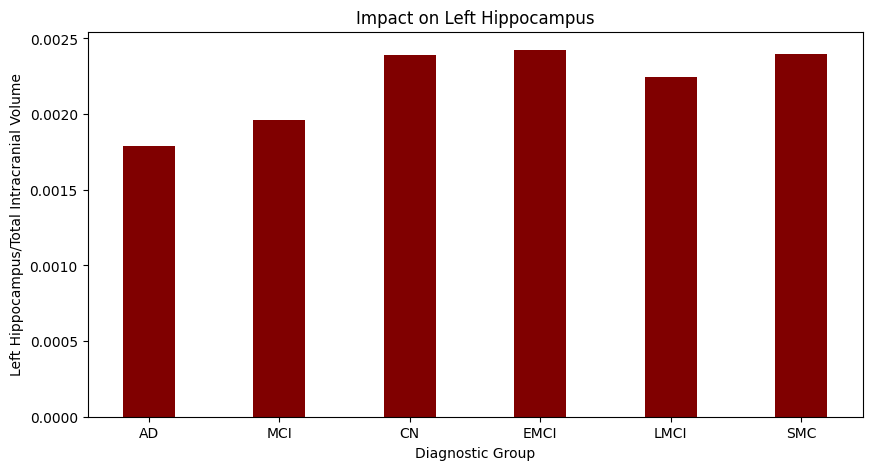

In [11]:
dataset = pd.read_csv(DATASET)
data1 = dataset['Left-Hippocampus']
data2 = dataset['Group']
fig = plt.figure(figsize = (10, 5))
data = pd.DataFrame()
ad,mci,cn,emci,lmci,smc = 0,0,0,0,0,0
c1,c2,c3,c4,c5,c6 = 0,0,0,0,0,0
for index, row in dataset.iterrows():
    if row['Group'] == 'AD': 
        ad+= row['LHC_ICV']
        c1+=1
    elif row['Group'] == 'MCI': 
        mci+= row['LHC_ICV']
        c2+=1
    elif row['Group'] == 'CN': 
        cn+= row['LHC_ICV']
        c3+=1
    elif row['Group'] == 'EMCI': 
        emci+= row['LHC_ICV']
        c4+=1
    elif row['Group'] == 'LMCI': 
        lmci+= row['LHC_ICV']
        c5+=1
    elif row['Group'] == 'SMC': 
        smc+= row['LHC_ICV']
        c6+=1
data = {'Group':['AD','MCI','CN','EMCI','LMCI','SMC'],
        'Mean Ratio':[(ad/c1),(mci/c2),(cn/c3),(emci/c4),(lmci/c5),(smc/c6)]}

# creating the bar plot
plt.bar(data['Group'], data['Mean Ratio'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Diagnostic Group")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.title("Impact on Left Hippocampus")
plt.show()

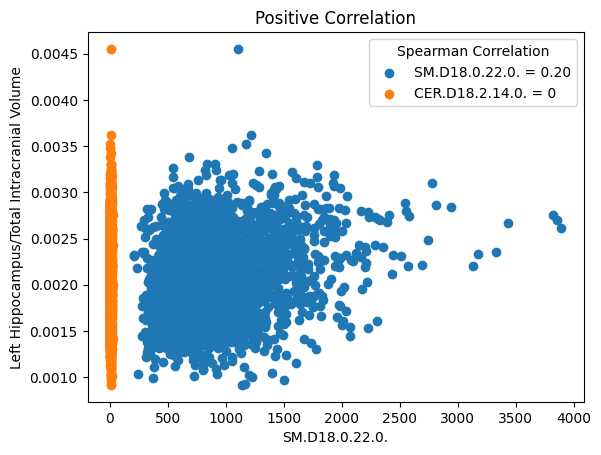

In [22]:
dataset = pd.read_csv(DATASET)
plt.scatter(dataset['SM.D18.0.22.0.'], dataset['LHC_ICV'])
plt.scatter(dataset['CER.D18.2.14.0.'], dataset['LHC_ICV'])
legend_labels = ["SM.D18.0.22.0. = 0.20", "CER.D18.2.14.0. = 0"]
plt.legend(title='Spearman Correlation',labels=legend_labels)
plt.xlabel("SM.D18.0.22.0.")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.title("Positive Correlation")
plt.show()



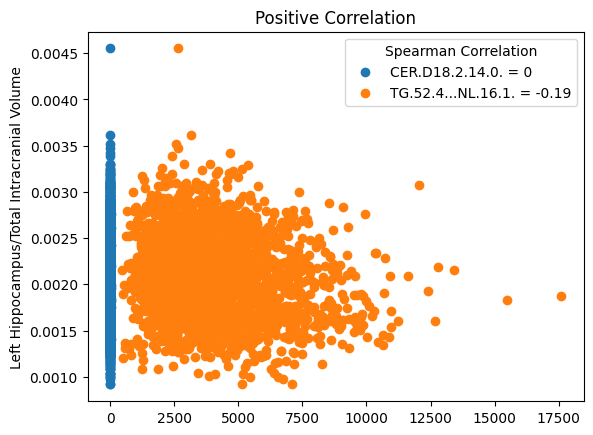

In [21]:
dataset = pd.read_csv(DATASET)
plt.scatter(dataset['CER.D18.2.14.0.'], dataset['LHC_ICV'])
plt.scatter(dataset['TG.52.4...NL.16.1.'], dataset['LHC_ICV'])
legend_labels = ["CER.D18.2.14.0. = 0", "TG.52.4...NL.16.1. = -0.19"]
plt.legend(title='Spearman Correlation',labels=legend_labels)
plt.xlabel("")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.title("Positive Correlation")
plt.show()